Pomimo, ze mamy masę przeróżnych bibliotek do wizualizacji danych w Pythonie, Seaborn oraz Matplotlib wyróżniają się pod kątem możliwości tworzenia oraz 
dostosowania różnego rodzaju wizualizacji danych oraz wykresów. W obecnym artykule przejdę przez podstawowy zbiór parametrów, który umożliwi spersonalizować 
dowolny wykres do waszych potrzeb. 

### W pierwszej kolejności wczytujemy potrzebne biblioteki

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') # https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
import matplotlib as mpl
import matplotlib.gridspec as gridspec
# %matplotlib inline #do rysowania ładnych wykresów w Notebooku
from matplotlib import ticker
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os
import pandas as pd

### Tworzę przydatne funkcje oraz ustawiam ścieżki + dodaję zbiór danych do wizualizacji

In [9]:
IMAGES_PATH = "E:\page ds\pages\plt_and_sns_cheatsheet"  # lub "." 

# funkcja do zapisywania wykresow z bardziej wypasionymi opcjami
def save_fig(file_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, file_name + "." + fig_extension)
    print("Zapisywanie rysunku ", file_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# przykładowe dane, 
#od.download("https://www.kaggle.com/datasets/shelvigarg/credit-card-buyers/archive.zip")
data_path = "E:/page ds/pages/szeregowanie mocy zmiennych modelu drzewa/redit_card.csv" 
credit_cards_data = pd.read_csv(data_path)
#credit_cards_data.info()
#display(credit_cards_data)
#credit_cards_data.isna().sum()
credit_cards_data['Credit_Product'] = credit_cards_data['Credit_Product'].fillna('lack')


Zacznijmy od początku i trochę teorii.
Matplotlib posiada dwa różne rodzaje interfejsów: pozycyjny oraz obiektowy. 
System pozycyjny pochodzi w prostej lini z MATLABa. Wykres definiujemy za pomocą kolejnych poleceń odpowiedzialnych za interesujące nas zakresy wykresu czy też dane do wyświetlenia. 

Zapisywanie rysunku  1_wykres_testowy


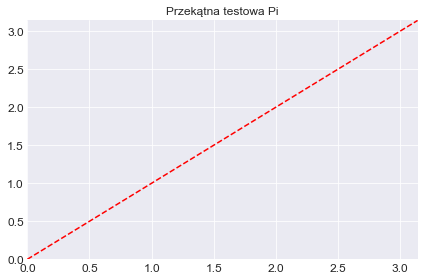

In [3]:
fig = plt.figure()
plt.plot([0, 3.1415], [0, 3.1415],'r--')
plt.xlim([0.0, 3.1415])
plt.ylim([0.0, 3.1415])
plt.title('Przekątna testowa Pi')
save_fig("1_wykres_testowy")  
plt.show()


Jest to dobra metoda do tworzenia prostych wykresów gdzie po kolei wyświetlamy elementy wykresy poprzez wstawianie plt.[komponent]. 
Inną metodą jest traktowanie wykresu jak obiekt gdzie używamyinstancji modułu **axes.Axes** w celu renderowania wizualizacji na instancji **figure.Figure**. 
Więcej informacji znajdziecie w [The Lifecycle of the plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html)

Zapisywanie rysunku  02_wykres_testowy


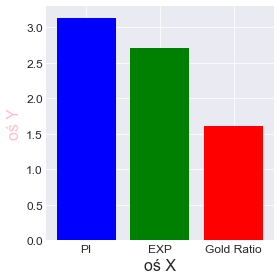

In [4]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(x=['PI','EXP','Gold Ratio'], height=[3.14,2.71,1.61], color=['blue','green','red'])
ax.set_xlabel(xlabel='oś X', size=16)
ax.set_ylabel(ylabel='oś Y' , color='pink', size=16)
save_fig("02_wykres_testowy")
plt.show()


W API zorientowanym obiektowo generalnie chodzi o to, że tworzymy obiekt '*figure*' o którym możemy myśleć jak o ograniczającej skrzynce całej wizualizacji do której bedziemy wkładać obiekty '*axes*' (jeden lub kilka) które tak naprawde są (pod)wykresami którymi można manipulować korzystając z metod obiektu '*axes*' (do zastanowienia - kto wpadł na pomysł, żeby na '*wykres*' mówić  '*osie*'. 

Elementy wykresu bardzo dobrze obrazuje obrazek pobrany ze strony https://pbpython.com/effective-matplotlib.html


### Etykiety, tytuł wykresu, znaczniki osi
Dobra grafika potrzebuje dobrze sformatowanego tutułu, etykiet wykresu, oraz znaczników osi. Jeżeli np. przetwarzamy waluty dobrze dodać symbol danej waluty np. '$' a gdy przetwarzamy bardzo duże liczby dobrze ściąć zera i dodać symbol tysięcy, milionów itp (odpowiednio K, M, etc.). Małe liczby powinny zostać zaokrąglone do co najwyżej 3 miejsc po przecinku. Dobrze dodać również separator ‘,’ dla dużych liczb czyli zamiast 1000000 wyświetlić 1,000,000. 
Na końcu, tytuł oraz znaczniki osi muszą być widoczne więc potrzebujemy odpowiedniego rozmiaru. Poniżej kod dla każdej ze wspomianych zmian:


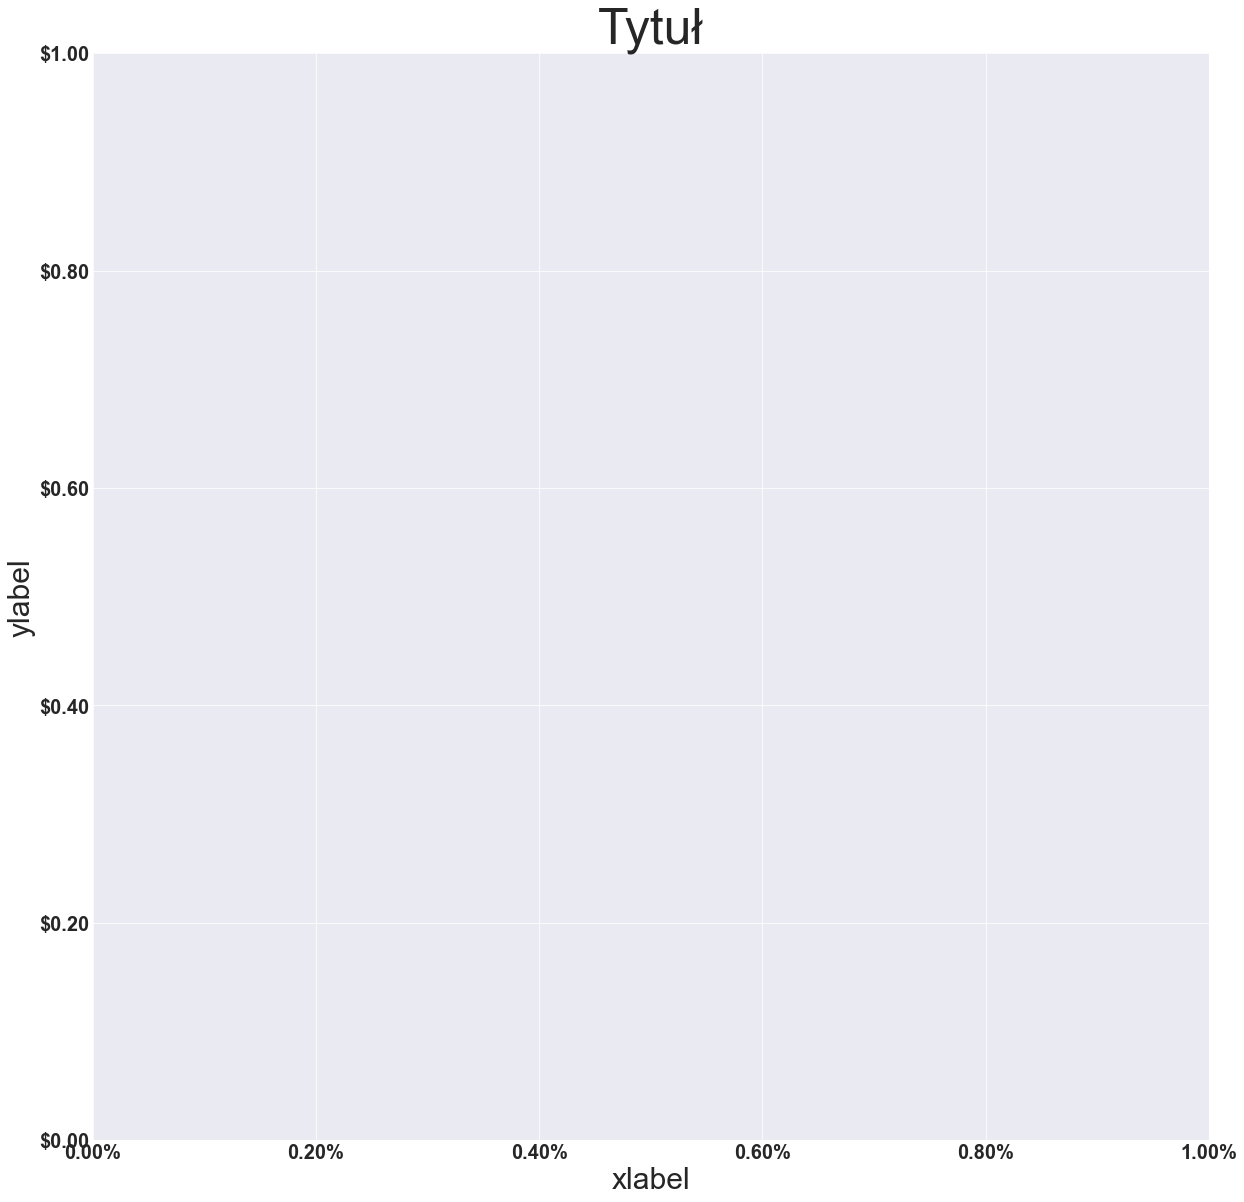

In [5]:
#tworzenie figury
fig,ax = plt.subplots(figsize=(20,20))

#Dodawanie tytułu oraz wielkości czcionki \
plt.title('Tytuł',fontsize=50)

#Dodawanie nazw osi z wielkością osi
plt.xlabel('xlabel',fontsize=30)
plt.ylabel('ylabel',fontsize=30)

#rozmiar znaczników osi [ 'normal' | 'bold' | 'heavy' | 'light' | #'ultrabold' | 'ultralight']
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=20,weight='bold')

#Format znaczników oraz waluty lub prefixu (zamień $ z inną wybraną walutą)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x}"))
#Format znaczników osi jako odległość lub inny sufix (zamień km na inny dowolny wybór)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x} km"))

#Format znacniki dziesiętne, cyfra poprzedzająca f oznacza ile mamy liczn w precyzji liczby zmiennoprzecinkowej
#np. wykorzystaj .3f dla 3 miejsc po przecinku ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))

#Dodajmy separator ',' dla dużych liczb np. 10000 zamień na 10,000
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))

#Format na typ procentowy 
ax.xaxis.set_major_formatter(ticker.PercentFormatter())

#Format na tysiące np. 10000 zamieniamy na 10.0K
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/1000,'1.1f')+'K'))

#Format na miliony np 1000000 na 1.0M
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.1f')+'M'))

#Przykład kombinacji znacników osi, walut  z & 2f oraz precyzja #precision
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}"))

### Adnotacja
Adnotacja to dobty sposób żeby wskazać specyficzny punkt na wykresue. Łącząc h-lines oraz v-lines można wskazać nazwy osi dla poszczególnego punktu. Poniżej przykład wraz z kropkowanym wskazaniem miejsca adnotacji

Zapisywanie rysunku  3_adnotacje


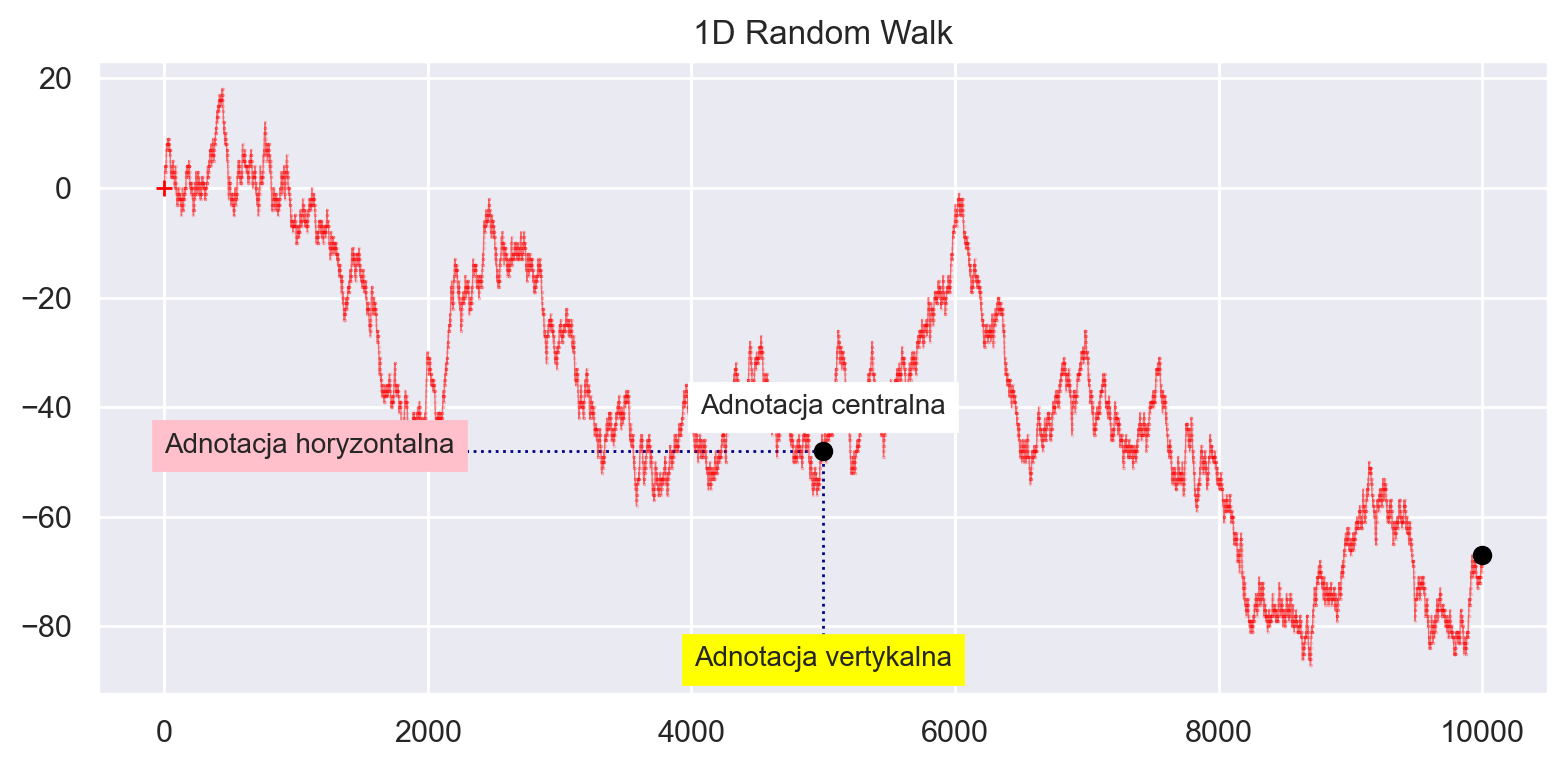

In [37]:
dims = 1
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c='red',alpha=0.25,s=0.05);
ax.plot(path,c='red',alpha=0.5,lw=0.5,ls='solid',);
ax.plot(0, start, c='red', marker='+')
ax.plot(step_n, stop, c='black', marker='o')
ax.plot(5000, int(path[5000]), c='black', marker='o')
plt.title('1D Random Walk')
plt.tight_layout(pad=0)

#ax2 = fig.add_subplot(2)
#ax2.annotate('annotation',ha='center',va='center', xy = (5000, int(path[5000])), xytext=(5000, int(path[5000])),fontsize=30)

#Add v-line with xcoord, min & max ranges with y and aesthetic #properties
plt.vlines(x=5000,ymin=int(min(path)),ymax=int(path[5000]),ls=':',lw=1,color='darkblue')
#Add h-line with ycoord, min & max ranges with xand aesthetic #properties
plt.hlines(y=int(path[5000]),xmin=-0.05,xmax=5000,ls=':',lw=1,color='darkblue')
# różne rodzaje prostych https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

ax.annotate('Adnotacja centralna',ha='center',va='center', xy = (5000, int(path[5000])), xytext=(5000+1,int(path[5000])+8),fontsize=10, backgroundcolor='white')
ax.annotate('Adnotacja horyzontalna',ha='left',va='center', xy = (0, int(path[5000])), xytext=(0,int(path[5000])+1),fontsize=10, backgroundcolor='pink')
ax.annotate('Adnotacja vertykalna',ha='center',va='center', xy = (5000, int(min(path))), xytext=(5000,int(min(path))+1),fontsize=10, backgroundcolor='yellow')
save_fig("3_adnotacje")  

### Rozmiar, ograniczenia, legenda
Często musimy zmienic kształt lub rozmiar grafiki. Musimy dodatkowo być ostrożni określając limity dla osi X oraz Y, specjalnie kiedy występują zmienne odstające w danych. Również bardzo przydatna jest legenda, z aktualnymi etykietami oraz rozmiarami znaczników.

Poniżej kod:

In [ ]:
#Zmień rozmiar figury poprzez dostosowanie parametru 'figsize'
fig,ax = plt.subplots(figsize=(25,25))

#Adnotacja, v-lines & h-lines wytłumaczone poprzednio
ax.annotate('Blue',ha='center',va='center', xy = (0.5, 0.5), xytext=(0.51,0.51),fontsize=30,color='darkblue')
plt.vlines(x=0.5,ymin=-0.05,ymax=0.5,ls=':',lw=3,color='darkblue')
plt.hlines(y=0.5,xmin=-0.05,xmax=0.5,ls=':',lw=3,color='darkblue')

#Wykres typu Scatter plot dla pojedynczego punktu, parametr label pojawia się na legendzie
# Aby tego uniknąć można dodać '_no_legend_' 

ax.scatter(x=0.5,y=0.5,label='Blue point')

#Aadnotacja, v-lines & h-lines as explained above
ax.annotate('Red',ha='center',va='center', xy = (0.75, 0.75), xytext=(0.76,0.76),fontsize=30,color='darkred')
plt.vlines(x=0.75,ymin=-0.05,ymax=0.75,ls=':',lw=3,color='darkred')
plt.hlines(y=0.75,xmin=-0.05,xmax=0.75,ls=':',lw=3,color='darkred')
#Scatter plot of one point
ax.scatter(x=0.75,y=0.75,label='Red point')

#Znaczniki osi xticks & yticks wytłumaczone powyżej
plt.xticks(fontsize=25,weight='bold')
plt.yticks(fontsize=25,weight='bold')

#xlim określa limity wyświetlania osi X ,pierwszy argument min limit & drugi argument #argument max limit
plt.xlim(0,1)

#ylim określa limity osi Y
plt.ylim(0,1)

#parametr loc określa lokalizację
#markerscale mówi jak wielkie powinny być znaczniki na legendzie w proporcji do aktualnch znaczników. 2 imlikuje dwikrotnie większe
plt.legend(loc=1,prop={'size':25},markerscale=2)
plt.title('Przykład rozmiarowania',fontsize=35)

### Zwiększanie wymiarowości - kilka wykresów na jednej ramce
W sytuacji gdy chcemy umieścić kilka wykresów na jednym i każdy ma ten sam zakres wartości X oraz Y, wystarczy wywołać wielokrotnie funkcję plot pakietu Seaborn. Poniżej przykład kodu wyświetlającego wykresy krzywych łamanych dla zmiennych nominalnych.

Zapisywanie rysunku  4_wymiarowosc_A


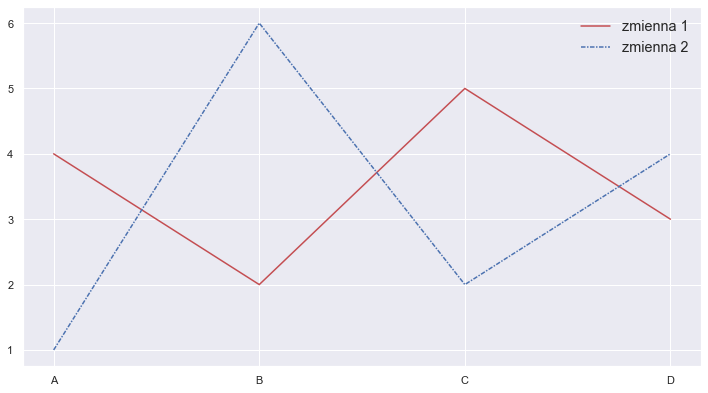

In [38]:
fig, ax = plt.subplots(figsize=(10,9/16*10))
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             ax=ax)
sns.lineplot(x=['A','B','C','D'], 
             y=[1,6,2,4], 
             color='b',
             ls=(0, (3, 1, 1, 1)),
             ax=ax)    
ax.legend(['zmienna 1', 'zmienna 2'], facecolor='w', fontsize = 'large')
save_fig("4_wymiarowosc_A")  
plt.show()

Zapisywanie rysunku  5_wymiarowosc_B


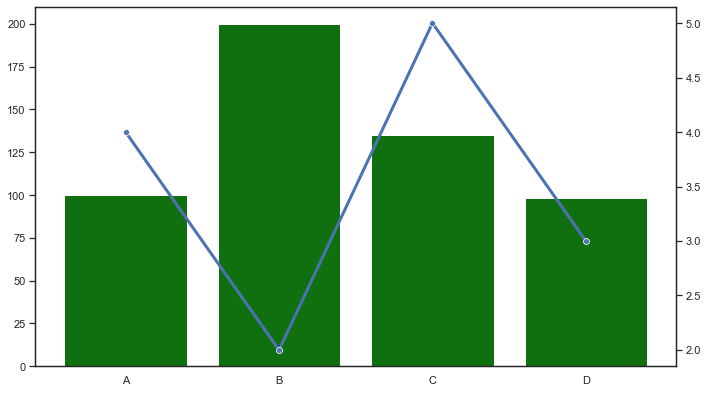

In [39]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(10,9/16*10))
ax2 = ax1.twinx()
sns.barplot(x=['A','B','C','D'],
            y=[100,200,135,98], 
            color='green',
            ax=ax1)
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='b',
             marker="o",
             ax=ax2)
save_fig("5_wymiarowosc_B")  
plt.show()
sns.set()

Ponieważ dwa narzucone wykkresy mają rózne skale Y, należy dodać opis do osi dodatkowej wykorzystując .twinx() a następnie wyświetlić dodatkową oś będącą kopią osi głównej. Wywołanie sns.set() po wyświetleniu wykresu przywraca wszystkie estetyki do ustawień defaultowych. 

Można również pogrupować słupki wykresu typu barplot co również zwiększa wymiar naszego wykresu. Poniżej kod w którym można w pełni spersonalizować kolor każdej serii danych


Zapisywanie rysunku  6_wymiarowosc_C


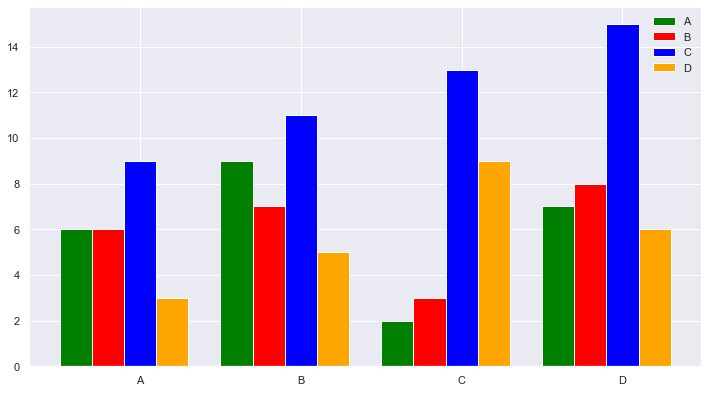

In [40]:
categorical_1 = ['A', 'B', 'C', 'D']
colors        = ['green', 'red', 'blue', 'orange']
numerical = [[6, 9, 2, 7],
             [6, 7, 3, 8],
             [9, 11, 13, 15],
             [3, 5, 9, 6]]
number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1)
fig, ax = plt.subplots(figsize=(10,9/16*10))
for i in range(number_groups):
    ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color=colors[i],
           align='center')
ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(categorical_1, facecolor='w')
save_fig("6_wymiarowosc_C")  
plt.show()

Wykresy można również mapować do różnych osi i przedstawić osobno na mini wykresach w odpowiednim układzie. Służą do tego układy 
FaceGrid i dużo ciekawych przykładów można znaleźć pod linkiem https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Zapisywanie rysunku  7_FaceGrid


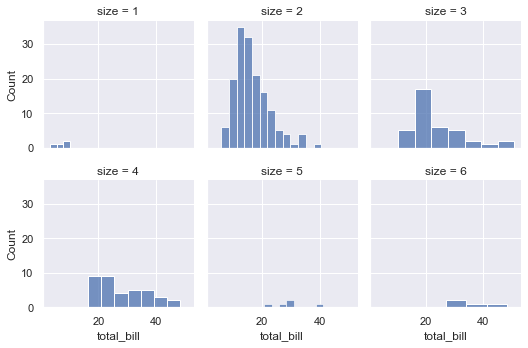

In [41]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="size", height=2.5, col_wrap=3)
g.map(sns.histplot, "total_bill")
save_fig("7_FaceGrid")  

Można również stworzyć niestandardowy układ jak pokazuje poniższy kod:

Zapisywanie rysunku  8_FaceGrid_dif


C:\Users\krzys\AppData\Local\Temp/ipykernel_25608/2481674339.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


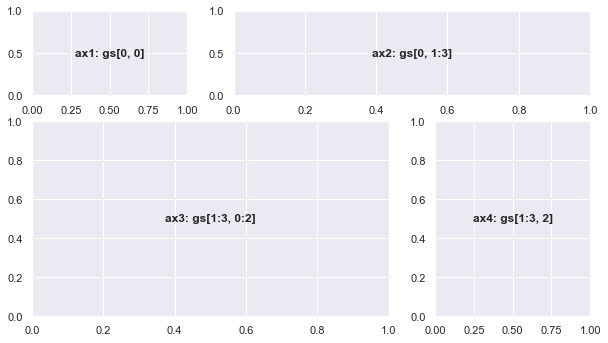

In [42]:
fig = plt.figure(figsize=(10,9/16*10))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, 'ax1: gs[0, 0]', fontsize=12, fontweight="bold", va="center", ha="center")  # adding text to ax1
ax2 = fig.add_subplot(gs[0, 1:3])
ax2.text(0.5, 0.5, 'ax2: gs[0, 1:3]', fontsize=12, fontweight="bold", va="center", ha="center")
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax3.text(0.5, 0.5, 'ax3: gs[1:3, 0:2]', fontsize=12, fontweight="bold", va="center", ha="center")
ax4 = fig.add_subplot(gs[1:3, 2])
ax4.text(0.5, 0.5, 'ax4: gs[1:3, 2]', fontsize=12, fontweight="bold", va="center", ha="center")
save_fig("8_FaceGrid_dif") 
plt.show()

Kolory, kształty oraz rozmiar liści na wykresie scaterPlot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Zapisywanie rysunku  9_FaceGrid


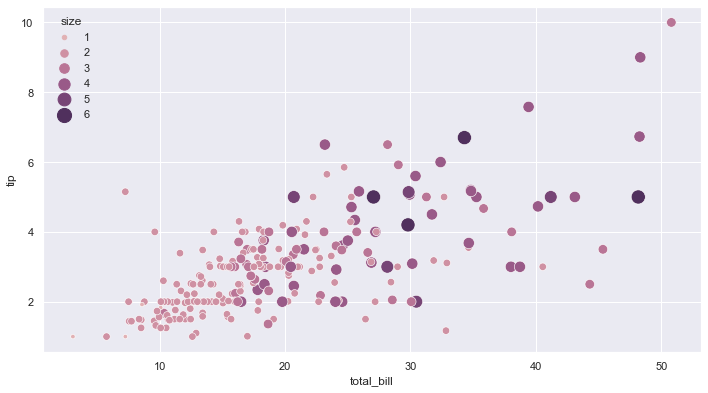

In [43]:
tips = sns.load_dataset("tips")
sns.set(rc={'figure.figsize':(10,9/16*10)})
ax = sns.scatterplot(x="total_bill", y="tip",
                     hue="size", size="size",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=tips)
save_fig("9_FaceGrid") 
plt.show()

Poniżej wstawiamy znacznik. Ponieważ osie X oraz Y są róznej skali korzystam z elipsy parametryzując promień koła 1/20 całości. Należy również uwzględnić rozdzielczość wykresu, w tym przypadku jest to 8:4. 

Zapisywanie rysunku  10_Circle


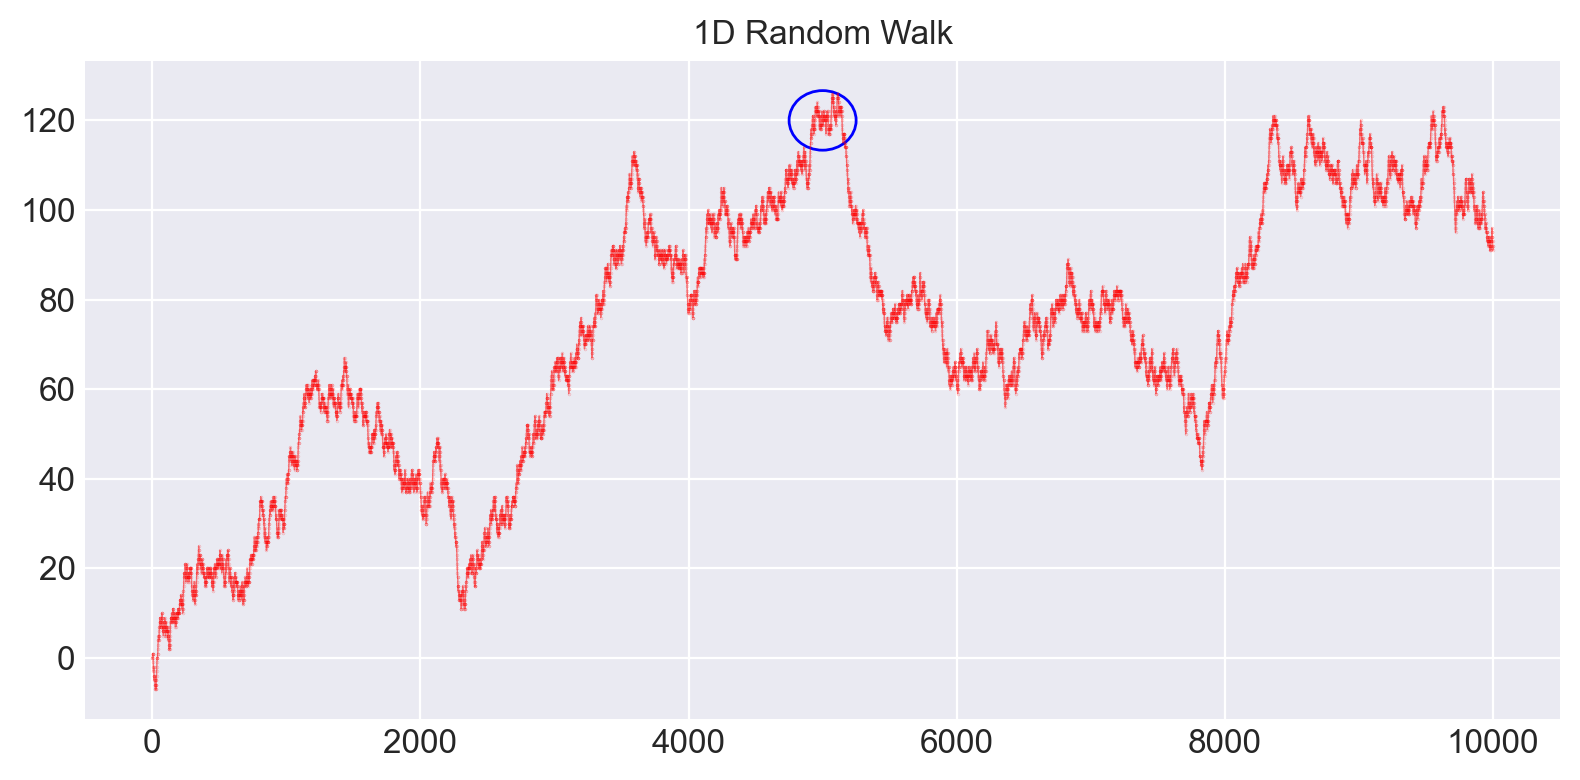

In [10]:
import matplotlib.patches as pch

dims = 1
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path

fig, ax = plt.subplots(figsize=(8,4),dpi=200) # note we must use plt.subplots, not plt.subplot
circle1 = pch.Ellipse((5000, path[5000]), 10000/20, (max(path)-min(path))/20*(8/4), color='b', fill=False)  # wtawiłem Ellipse 

ax.scatter(np.arange(step_n+1), path, c='red',alpha=0.25,s=0.05);
ax.plot(path,c='red',alpha=0.5,lw=0.5,ls='solid',);
ax.add_patch(circle1)
plt.title('1D Random Walk')
plt.tight_layout(pad=0)
save_fig("10_Circle") 